In [1]:
import sys
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def target_func(x):
    return np.exp(np.sin(2*np.pi*x))

In [3]:
def make_sinusoidal_dataset(n: int=100, noise: float=0.1, plot=False):
    X = np.random.uniform(low=0, high=1, size=(n,1))
    noise = np.random.normal(loc=0., scale=noise, size=(n,1))
    y = target_func(X) + noise
    if plot:
        plt.scatter(X,y, s=5); plt.show()
    X = torch.from_numpy(X).float()
    y = torch.from_numpy(y).float()
    data_loader = torch.utils.data.DataLoader(
        dataset=torch.utils.data.TensorDataset(X,y),
        batch_size=32, shuffle=True
    )
    return data_loader

In [4]:
def shallow_model_for_sin(num_hidden_units: int):
    return nn.Sequential(
        nn.Linear(in_features=1, out_features=num_hidden_units),
        nn.Tanh(), # Use tanh instead of relu as it is more suited because of the sinusoidal curve
        nn.Linear(in_features=num_hidden_units, out_features=1),
    )

In [5]:
def train(ax, n, num_hidden_units=3, lr=0.01, num_epochs=100):
    print(f"##### n: {n}, num_hidden_units: {num_hidden_units}")
    device=torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
    data_loader = make_sinusoidal_dataset(n=n, noise=0.1)
    model = shallow_model_for_sin(num_hidden_units=num_hidden_units).to(device)

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(params=model.parameters(), lr=lr)
    for e in range(num_epochs):
        epoch_loss = 0
        num_instances = 0
        for batch in data_loader:
            x,y = batch
            x = x.to(device)
            y = y.to(device)
            optimizer.zero_grad()
            pred = model(x)
            loss = criterion(pred,y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item() * x.shape[0]
            num_instances += x.shape[0]
        print(f"{e+1}/{num_epochs}: loss = {epoch_loss:.5f}")

    x = np.linspace(0, 1, 100)
    x = x.reshape(1,100,1)
    y = model(torch.from_numpy(x).float().to(device)).detach().cpu().numpy()[0]
    if ax is not None:
        ax.plot(x[0],y, label="model")
        ax.plot(x[0], target_func(x[0]), label="target func")
        ax.legend()
        ax.set_yticks([])
        ax.set_xticks([])
        x, y = data_loader.dataset.tensors
        ax.scatter(x,y, s=10, alpha=0.2)
        ax.set_title(f"n_samples={n}, n_hiddens={num_hidden_units}")
    return y

##### n: 6, num_hidden_units: 3
1/100: loss = 16.30666
2/100: loss = 11.25567
3/100: loss = 7.64656
4/100: loss = 5.97714
5/100: loss = 6.12542
6/100: loss = 7.13673
7/100: loss = 7.81415
8/100: loss = 7.66735
9/100: loss = 6.90712
10/100: loss = 5.95490
11/100: loss = 5.16428
12/100: loss = 4.71952
13/100: loss = 4.62839
14/100: loss = 4.77042
15/100: loss = 4.96813
16/100: loss = 5.06164
17/100: loss = 4.96364
18/100: loss = 4.67561
19/100: loss = 4.26969
20/100: loss = 3.85310
21/100: loss = 3.52787
22/100: loss = 3.35363
23/100: loss = 3.32343
24/100: loss = 3.36722
25/100: loss = 3.38973
26/100: loss = 3.32524
27/100: loss = 3.17321
28/100: loss = 2.99201
29/100: loss = 2.85859
30/100: loss = 2.82055
31/100: loss = 2.86871
32/100: loss = 2.94678
33/100: loss = 2.99103
34/100: loss = 2.97087
35/100: loss = 2.90202
36/100: loss = 2.82804
37/100: loss = 2.78698
38/100: loss = 2.78615
39/100: loss = 2.80066
40/100: loss = 2.79531
41/100: loss = 2.75176
42/100: loss = 2.67975
43/100: l

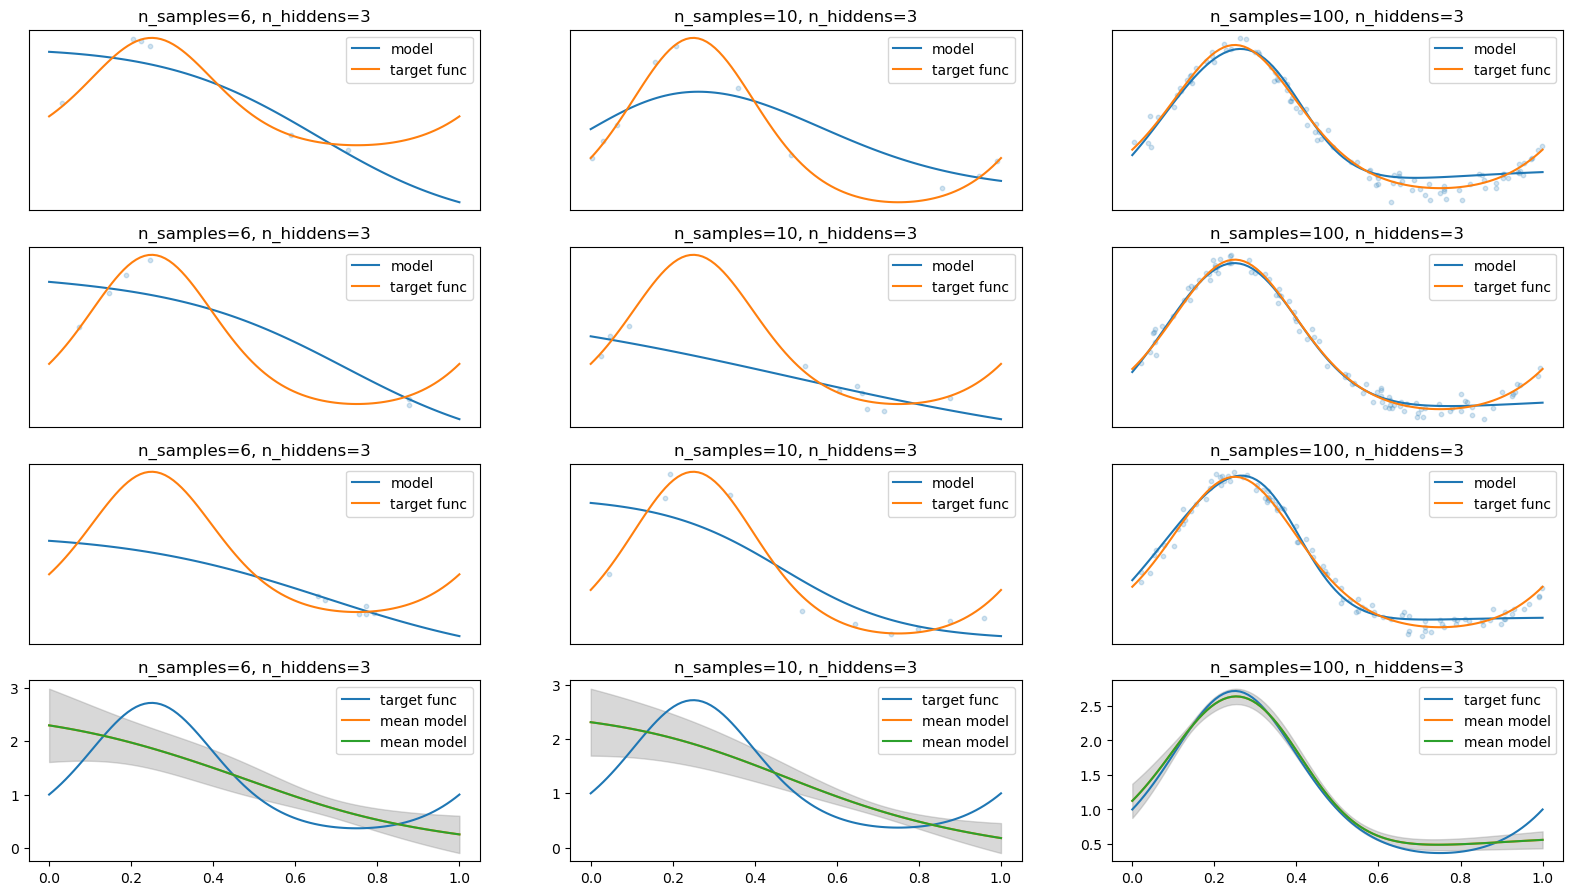

In [6]:
num_hidden_units = 3
num_epochs=100
lr=0.1
fig, axes = plt.subplots(4,3,figsize=(19.8, 10.8))
axes = axes.ravel()
for i, n in enumerate([6, 10, 100]):
    train(ax=axes[i], n=n, num_epochs=num_epochs, lr=lr, num_hidden_units=num_hidden_units)
    train(ax=axes[i+3], n=n, num_epochs=num_epochs, lr=lr, num_hidden_units=num_hidden_units)
    train(ax=axes[i+6], n=n, num_epochs=num_epochs, lr=lr, num_hidden_units=num_hidden_units)
    y_pred = []
    for _ in range(10):
        y=train(ax=None, n=n, num_epochs=num_epochs, lr=lr, num_hidden_units=num_hidden_units)
        y_pred.append(y)
    y_pred = np.array(y_pred)
    mean_pred = y_pred.mean(axis=0)
    std_pred = y_pred.std(axis=0)
    x = np.linspace(0, 1, 100)
    axes[i+9].plot(x, target_func(x), label="target func")
    axes[i+9].plot(x, mean_pred, label="mean model")
    axes[i+9].set_title(f"n_samples={n}, n_hiddens={num_hidden_units}")
    axes[i+9].plot(x, mean_pred, label="mean model")
    axes[i+9].fill_between(x, (mean_pred-std_pred).reshape(-1), (mean_pred+std_pred).reshape(-1), color="gray", alpha=0.3)
    axes[i+9].legend()
plt.show()

##### n: 100, num_hidden_units: 3
1/100: loss = 228.11907
2/100: loss = 86.85931
3/100: loss = 91.56034
4/100: loss = 69.30099
5/100: loss = 65.75701
6/100: loss = 61.50711
7/100: loss = 53.45688
8/100: loss = 45.71485
9/100: loss = 37.61012
10/100: loss = 33.19936
11/100: loss = 27.95066
12/100: loss = 30.81545
13/100: loss = 30.72393
14/100: loss = 31.48314
15/100: loss = 29.39910
16/100: loss = 28.86702
17/100: loss = 28.25748
18/100: loss = 27.92189
19/100: loss = 27.86365
20/100: loss = 27.64947
21/100: loss = 27.31932
22/100: loss = 27.89080
23/100: loss = 28.57581
24/100: loss = 26.96398
25/100: loss = 27.16457
26/100: loss = 26.17982
27/100: loss = 27.05875
28/100: loss = 25.94665
29/100: loss = 26.65837
30/100: loss = 25.04348
31/100: loss = 24.51198
32/100: loss = 24.71787
33/100: loss = 24.95787
34/100: loss = 24.01668
35/100: loss = 24.24637
36/100: loss = 24.76436
37/100: loss = 22.90176
38/100: loss = 24.28000
39/100: loss = 22.67562
40/100: loss = 26.24852
41/100: loss =

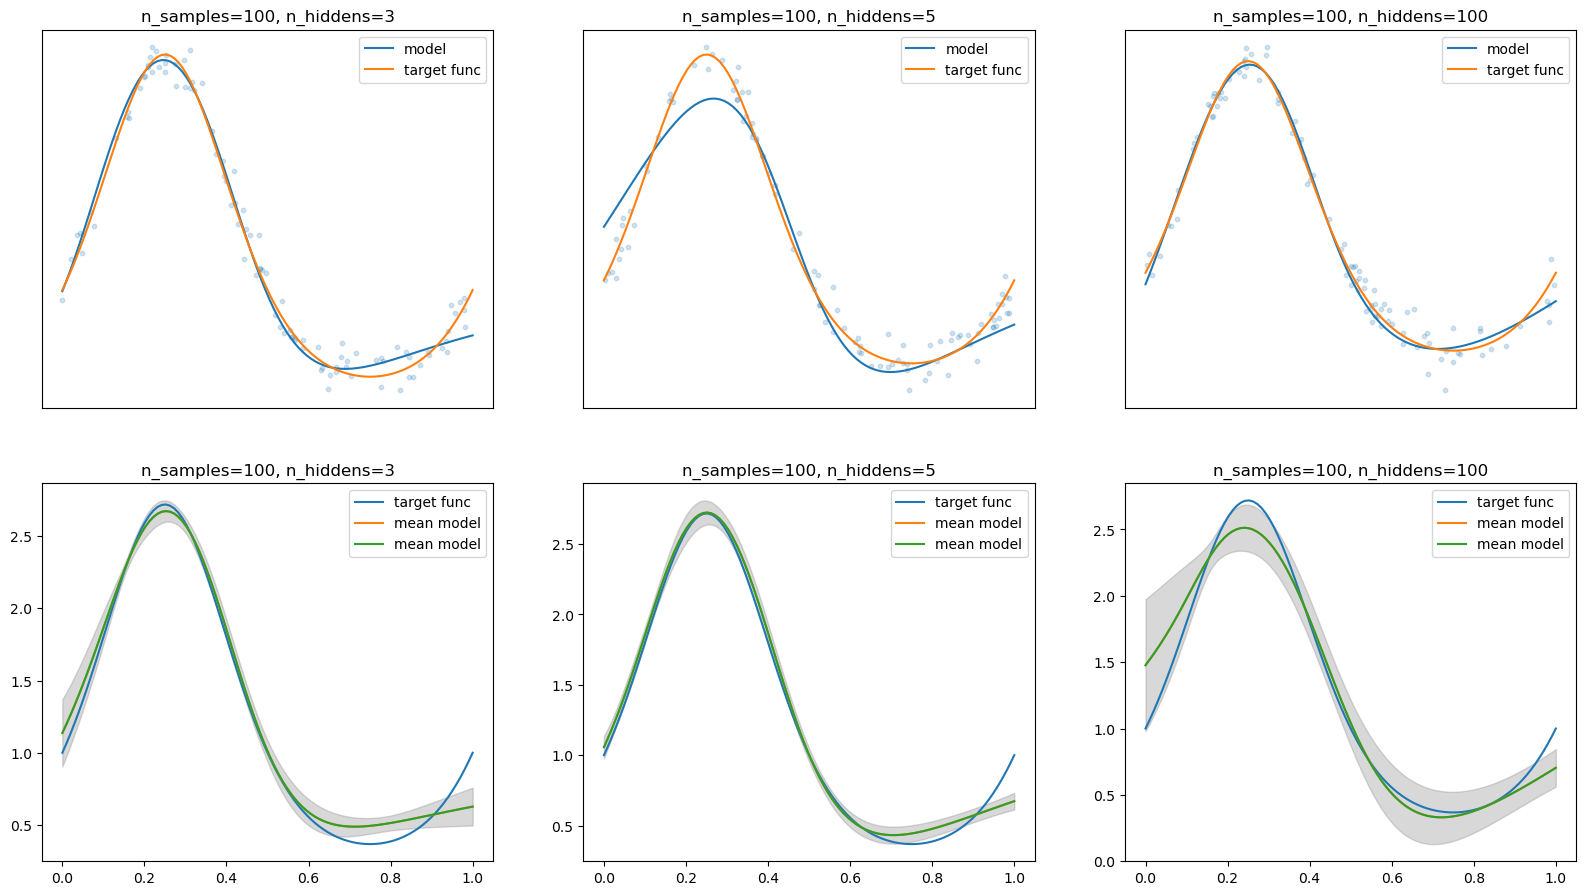

In [7]:
n = 100
num_epochs=100
lr=0.1
fig, axes = plt.subplots(2,3,figsize=(19.8, 10.8))
axes = axes.ravel()
for i, num_hidden_units in enumerate([3, 5, 100]):
    train(ax=axes[i], n=n, num_epochs=num_epochs, lr=lr, num_hidden_units=num_hidden_units)
    y_pred = []
    for _ in range(10):
        y=train(ax=None, n=n, num_epochs=num_epochs, lr=lr, num_hidden_units=num_hidden_units)
        y_pred.append(y)
    y_pred = np.array(y_pred)
    mean_pred = y_pred.mean(axis=0)
    std_pred = y_pred.std(axis=0)
    x = np.linspace(0, 1, 100)
    axes[i+3].plot(x, target_func(x), label="target func")
    axes[i+3].plot(x, mean_pred, label="mean model")
    axes[i+3].set_title(f"n_samples={n}, n_hiddens={num_hidden_units}")
    axes[i+3].plot(x, mean_pred, label="mean model")
    axes[i+3].fill_between(x, (mean_pred-std_pred).reshape(-1), (mean_pred+std_pred).reshape(-1), color="gray", alpha=0.3)
    axes[i+3].legend()
plt.show()